# Setup Environtment (for Windows with Conda)

## Create Env & Install Dependencies

In [1]:
# conda create -n ckd_env python=3.11
# conda activate ckd_env
# pip install -r ./analysis/requirements_analysis.txt

# EDA and Pre-processing

## EDA (Exploratory Data Analysis)

### Importing the Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
sns.set_theme(color_codes=True)

### Set Seed Value

In [4]:
SEED = 42
np.random.seed(SEED)

### Importing the dataset

In [5]:
data = []
with open('./../datasets/chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))

# Columns
full = ['Age', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 
          'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Blood Glucose Random (mgs/dl)', 
          'Blood Urea (mgs/dl)', 'Serum Creatinine (mgs/dl)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 
          'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cell Count (cells/cmm)', 
          'Red Blood Cell Count (millions/cmm)', 'Hypertension', 'Diabetes Mellitus', 
          'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Class']

abbrev = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=abbrev)
df.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  bu  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  36   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  18   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  53   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  56   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  26   

    sc  sod  pot  hemo pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  \
0  1.2    ?    ?  15.4  44  7800  5.2  yes  yes  no  good   no   no   ckd   
1  0.8    ?    ?  11.3  38  6000    ?   no   no  no  good   no   no   ckd   
2  1.8    ?    ?   9.6  31  7500    ?   no  yes  no  poor   no  yes   ckd   
3  3.8  111  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes  yes   ckd   
4  1.4    ?    ?  11.6  35  7300  4.6   no   no  no  good   no   no   ckd   

  no_name  
0    None  
1    None  
2    None  
3    None  
4    None

### Data Understanding

In [6]:
# Get the basic information
print(f'Shape: {df.shape}')
print(f'\nColumns: {df.columns}')
print('\nInfo:')
df.info()
print('\nDescribe:')
df.describe()


Shape: (402, 26)

Columns: Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'no_name'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      402 non-null    object
 1   bp       400 non-null    object
 2   sg       400 non-null    object
 3   al       400 non-null    object
 4   su       400 non-null    object
 5   rbc      400 non-null    object
 6   pc       400 non-null    object
 7   pcc      400 non-null    object
 8   ba       400 non-null    object
 9   bgr      400 non-null    object
 10  bu       400 non-null    object
 11  sc       400 non-null    object
 12  sod      400 non-null    object
 13  pot      400 non-null    object
 14  hemo     400 non-null    object
 15  

age   bp     sg   al   su     rbc      pc         pcc          ba  \
count   402  400    400  400  400     400     400         400         400   
unique   78   11      6    7    7       3       3           3           3   
top      60   80  1.020    0    0  normal  normal  notpresent  notpresent   
freq     19  116    106  199  290     201     259         354         374   

        bgr   bu   sc  sod  pot hemo  pcv wbcc rbcc  htn   dm  cad appet   pe  \
count   400  400  400  400  400  400  400  400  400  400  400  400   400  400   
unique  147  119   87   35   43  119   45   93   50    3    7    4     4    4   
top       ?    ?  1.2    ?    ?    ?    ?    ?    ?   no   no   no  good   no   
freq     44   19   40   87   88   52   70  105  130  251  257  362   316  322   

        ane class no_name  
count   400   400       3  
unique    3     4       2  
top      no   ckd          
freq    339   248       2

In [7]:
# Total unique values
print('Total Unique Values:')
df.nunique()

Total Unique Values:


age         78
bp          11
sg           6
al           7
su           7
rbc          3
pc           3
pcc          3
ba           3
bgr        147
bu         119
sc          87
sod         35
pot         43
hemo       119
pcv         45
wbcc        93
rbcc        50
htn          3
dm           7
cad          4
appet        4
pe           4
ane          3
class        4
no_name      2
dtype: int64

### Data Cleaning and Preparation

In [8]:
# Drop column
df.drop(['no_name'], axis=1, inplace=True)

# Rename columns
df.rename(columns={'Hormonal Changes':'Hormonal_Changes', 
                   'Family History':'Family_History', 
                   'Race/Ethnicity':'Ethnicity',
                   'Body Weight':'Body_Weight', 
                   'Calcium Intake':'Calcium_Intake', 
                   'Vitamin D Intake':'Vitamin_D_Intake',
                   'Physical Activity':'Physical_Activity',
                   'Alcohol Consumption':'Alcohol_Consumption',
                   'Medical Conditions':'Medical_Conditions', 
                   'Prior Fractures':'Prior_Fractures'}, inplace=True)

print(f'Columns: {df.columns}')

Columns: Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [9]:
print('Unique Values (Before Cleaning):')
df.apply(pd.Series.unique)

Unique Values (Before Cleaning):


age      [48, 7, 62, 51, 60, 68, 24, 52, 53, 50, 63, 40...
bp       [80, 50, 70, 90, ?, 100, 60, 110, 140, 180, 12...
sg            [1.020, 1.010, 1.005, 1.015, ?, 1.025, None]
al                             [1, 4, 2, 3, 0, ?, 5, None]
su                             [0, 3, 4, 1, ?, 2, 5, None]
rbc                            [?, normal, abnormal, None]
pc                             [normal, abnormal, ?, None]
pcc                         [notpresent, present, ?, None]
ba                          [notpresent, present, ?, None]
bgr      [121, ?, 423, 117, 106, 74, 100, 410, 138, 70,...
bu       [36, 18, 53, 56, 26, 25, 54, 31, 60, 107, 55, ...
sc       [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...
sod      [?, 111, 142, 104, 114, 131, 138, 135, 130, 14...
pot      [?, 2.5, 3.2, 4.0, 3.7, 4.2, 5.8, 3.4, 6.4, 4....
hemo     [15.4, 11.3, 9.6, 11.2, 11.6, 12.2, 12.4, 10.8...
pcv      [44, 38, 31, 32, 35, 39, 36, 33, 29, 28, ?, 16...
wbcc     [7800, 6000, 7500, 6700, 7300, ?, 6900, 9600, .

In [10]:
# Clean the data
df = df.replace('?', np.nan)
df = df.fillna(np.nan)
df['class'] = df['class'].replace('ckd\t', 'ckd')
df['class'] = df['class'].replace('no', 'notckd')
df['pe'] = df['pe'].replace('good', 'no')
df['appet'] = df['appet'].replace('no', 'poor')
df['cad'] = df['cad'].replace('\tno', 'no')
df['dm'] = df['dm'].replace(' yes', 'yes')
df['dm'] = df['dm'].replace('\tyes', 'yes')
df['dm'] = df['dm'].replace('\tno', 'no')
df['dm'] = df['dm'].replace('', np.nan)

print('Unique Values (After Cleaning):')
df.apply(pd.Series.unique)

Unique Values (After Cleaning):


age      [48, 7, 62, 51, 60, 68, 24, 52, 53, 50, 63, 40...
bp       [80, 50, 70, 90, nan, 100, 60, 110, 140, 180, ...
sg                [1.020, 1.010, 1.005, 1.015, nan, 1.025]
al                                 [1, 4, 2, 3, 0, nan, 5]
su                                 [0, 3, 4, 1, nan, 2, 5]
rbc                                [nan, normal, abnormal]
pc                                 [normal, abnormal, nan]
pcc                             [notpresent, present, nan]
ba                              [notpresent, present, nan]
bgr      [121, nan, 423, 117, 106, 74, 100, 410, 138, 7...
bu       [36, 18, 53, 56, 26, 25, 54, 31, 60, 107, 55, ...
sc       [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...
sod      [nan, 111, 142, 104, 114, 131, 138, 135, 130, ...
pot      [nan, 2.5, 3.2, 4.0, 3.7, 4.2, 5.8, 3.4, 6.4, ...
hemo     [15.4, 11.3, 9.6, 11.2, 11.6, 12.2, 12.4, 10.8...
pcv      [44, 38, 31, 32, 35, 39, 36, 33, 29, 28, nan, ...
wbcc     [7800, 6000, 7500, 6700, 7300, nan, 6900, 9600.

In [11]:
print('Total Unique Values (After Cleaning):')
df.nunique()

Total Unique Values (After Cleaning):


age       77
bp        10
sg         5
al         6
su         6
rbc        2
pc         2
pcc        2
ba         2
bgr      146
bu       118
sc        86
sod       34
pot       42
hemo     118
pcv       44
wbcc      92
rbcc      49
htn        2
dm         2
cad        2
appet      2
pe         2
ane        2
class      2
dtype: int64

In [12]:
# Check for missing values
print('Total Missing Values:')
df.isna().sum()

Total Missing Values:


age        9
bp        14
sg        49
al        48
su        51
rbc      154
pc        67
pcc        6
ba         6
bgr       46
bu        21
sc        19
sod       89
pot       90
hemo      54
pcv       72
wbcc     107
rbcc     132
htn        4
dm         5
cad        4
appet      3
pe         3
ane        3
class      2
dtype: int64

In [13]:
# Duplicated rows
print(f'Shape (Before): {df.shape}')
print(f'Duplicated Rows: {df.duplicated().sum()}')
df.loc[df.duplicated()]

Shape (Before): (402, 25)
Duplicated Rows: 1


age   bp   sg   al   su  rbc   pc  pcc   ba  bgr   bu   sc  sod  pot hemo  \
401      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

     pcv wbcc rbcc  htn   dm  cad appet   pe  ane class  
401  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN

In [14]:
# Delete duplicated rows
df = df.drop_duplicates().reset_index(drop=True)
print(f'Shape (After): {df.shape}')
df.loc[df.duplicated()]

Shape (After): (401, 25)


Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe, ane, class]
Index: []

In [15]:
# Row where all values are null
df[df.isna().all(axis=1)]

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe, ane, class]
Index: []

In [16]:
# Delete row where the class is null
df = df.dropna(subset=['class']).reset_index(drop=True)

In [17]:

print('Data Type (Before):')
df.dtypes

Data Type (Before):


age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [18]:
# Turn numeric columns to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bp'] = pd.to_numeric(df['bp'], errors='coerce')
df['sg'] = pd.to_numeric(df['sg'], errors='coerce')
df['al'] = pd.to_numeric(df['al'], errors='coerce')
df['su'] = pd.to_numeric(df['su'], errors='coerce')
df['bgr'] = pd.to_numeric(df['bgr'], errors='coerce')
df['bu'] = pd.to_numeric(df['bu'], errors='coerce')
df['sc'] = pd.to_numeric(df['sc'], errors='coerce')
df['sod'] = pd.to_numeric(df['sod'], errors='coerce')
df['pot'] = pd.to_numeric(df['pot'], errors='coerce')
df['hemo'] = pd.to_numeric(df['hemo'], errors='coerce')
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wbcc'] = pd.to_numeric(df['wbcc'], errors='coerce')
df['rbcc'] = pd.to_numeric(df['rbcc'], errors='coerce')

print('Data Type (After):')
df.dtypes

Data Type (After):


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

### Feature Undestanding & Relationship

In [19]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

cat_cols.insert(0, 'sg')
num_cols.remove('sg')

cat_cols.insert(1, 'al')
num_cols.remove('al')

cat_cols.insert(2, 'su')
num_cols.remove('su')

print('Cat: ', cat_cols)
print('Num: ', num_cols)

Cat:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
Num:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


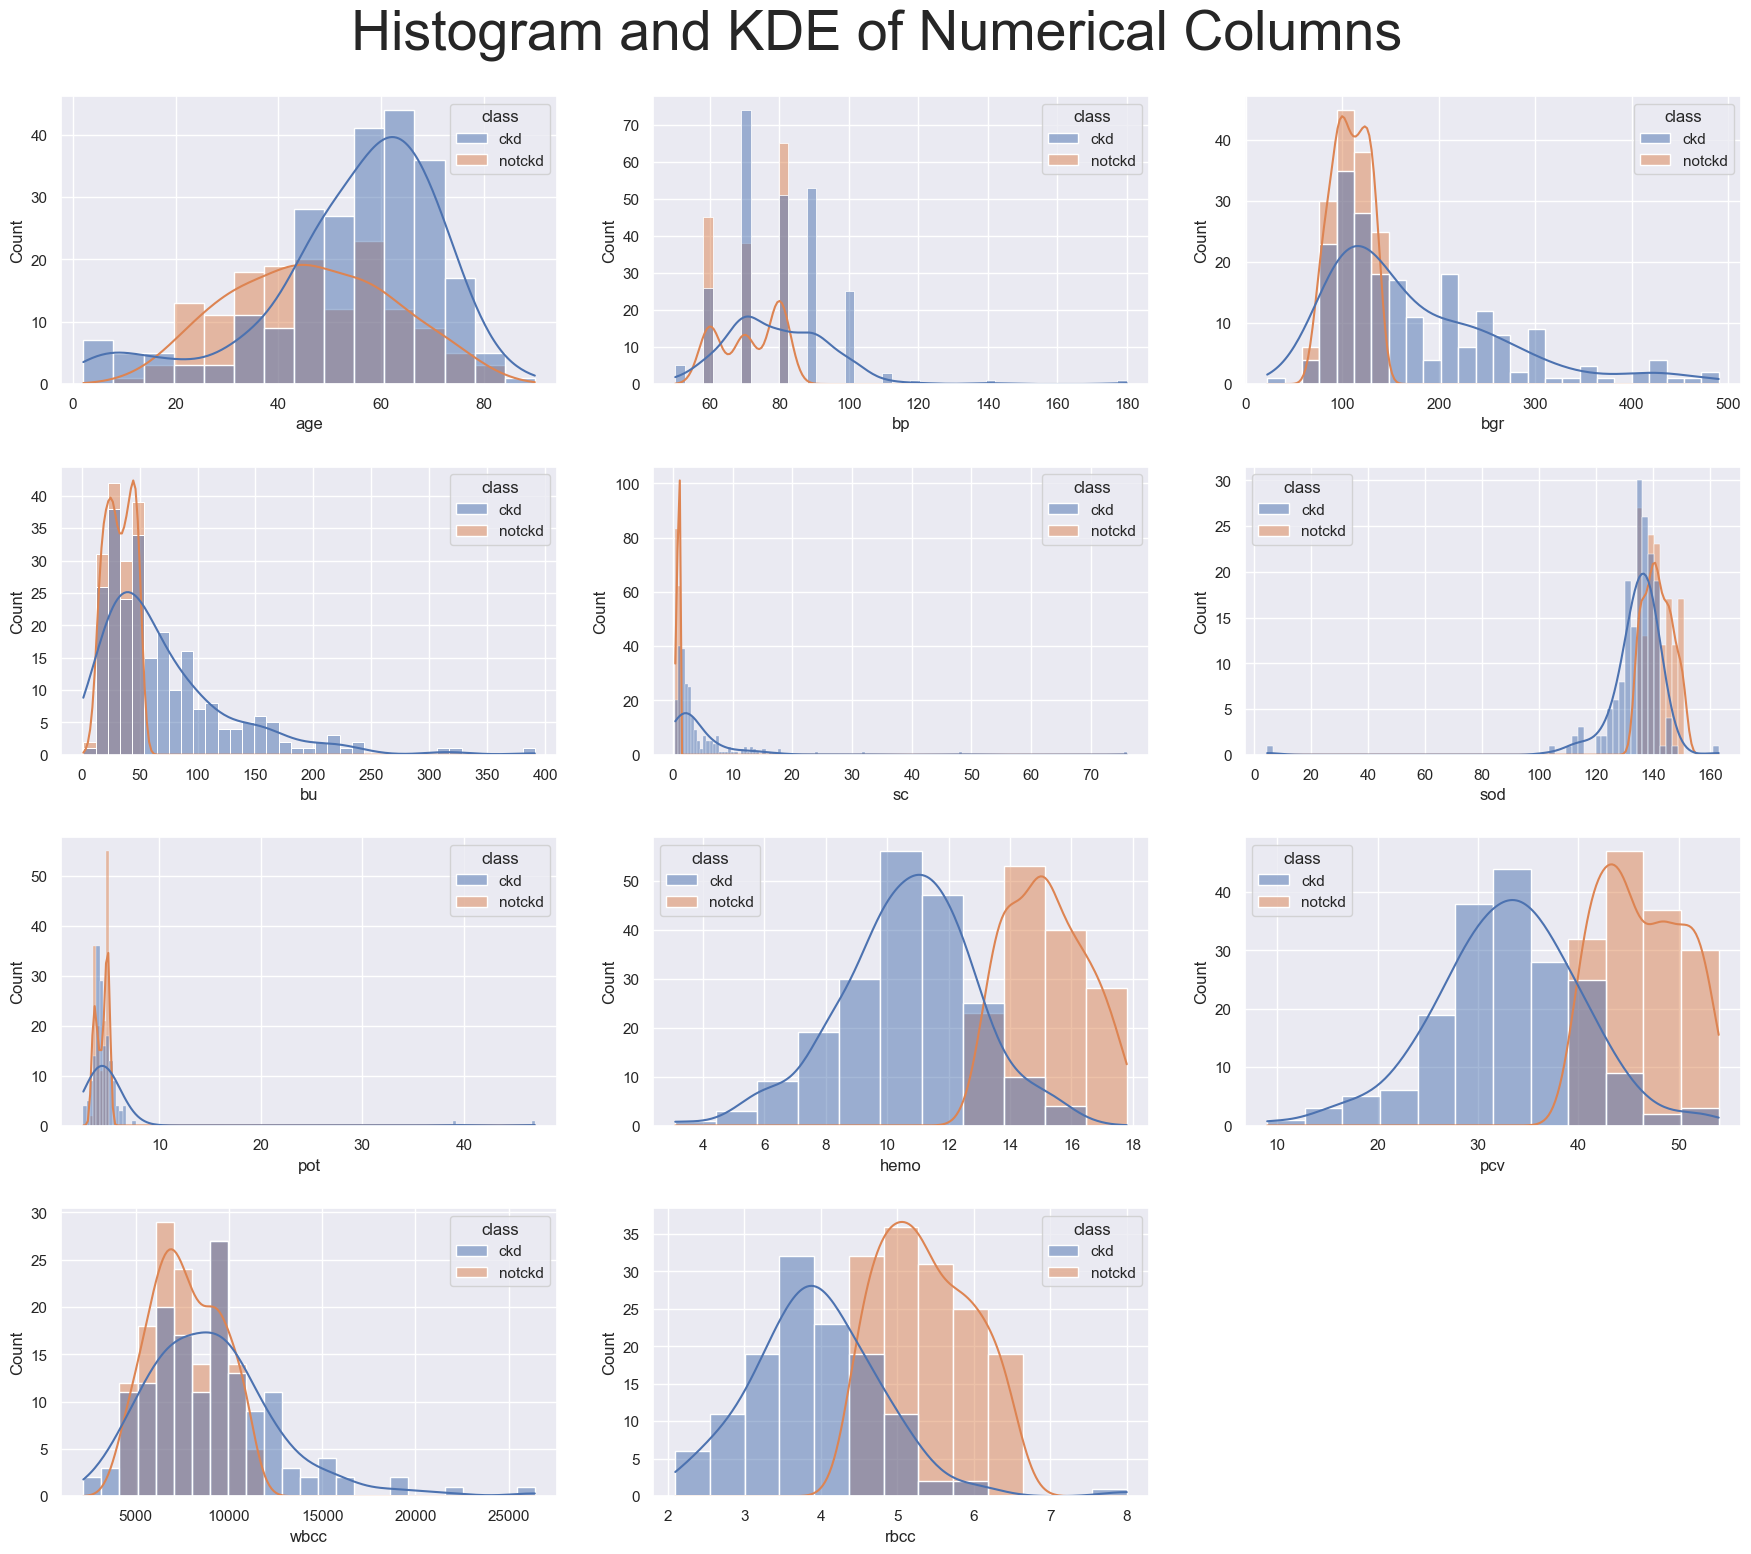

In [20]:
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

for idx in range(nrows*ncols):
    row_idx, col_idx = divmod(idx, ncols)
    
    if idx < len(num_cols):
        sns.histplot(x=df[num_cols[idx]], ax=ax[row_idx, col_idx], kde=True, hue=df['class'])
    else:
        ax[row_idx, col_idx].axis('off')

fig.suptitle('Histogram and KDE of Numerical Columns', fontsize=40)
plt.tight_layout(pad=2.0)
plt.show()

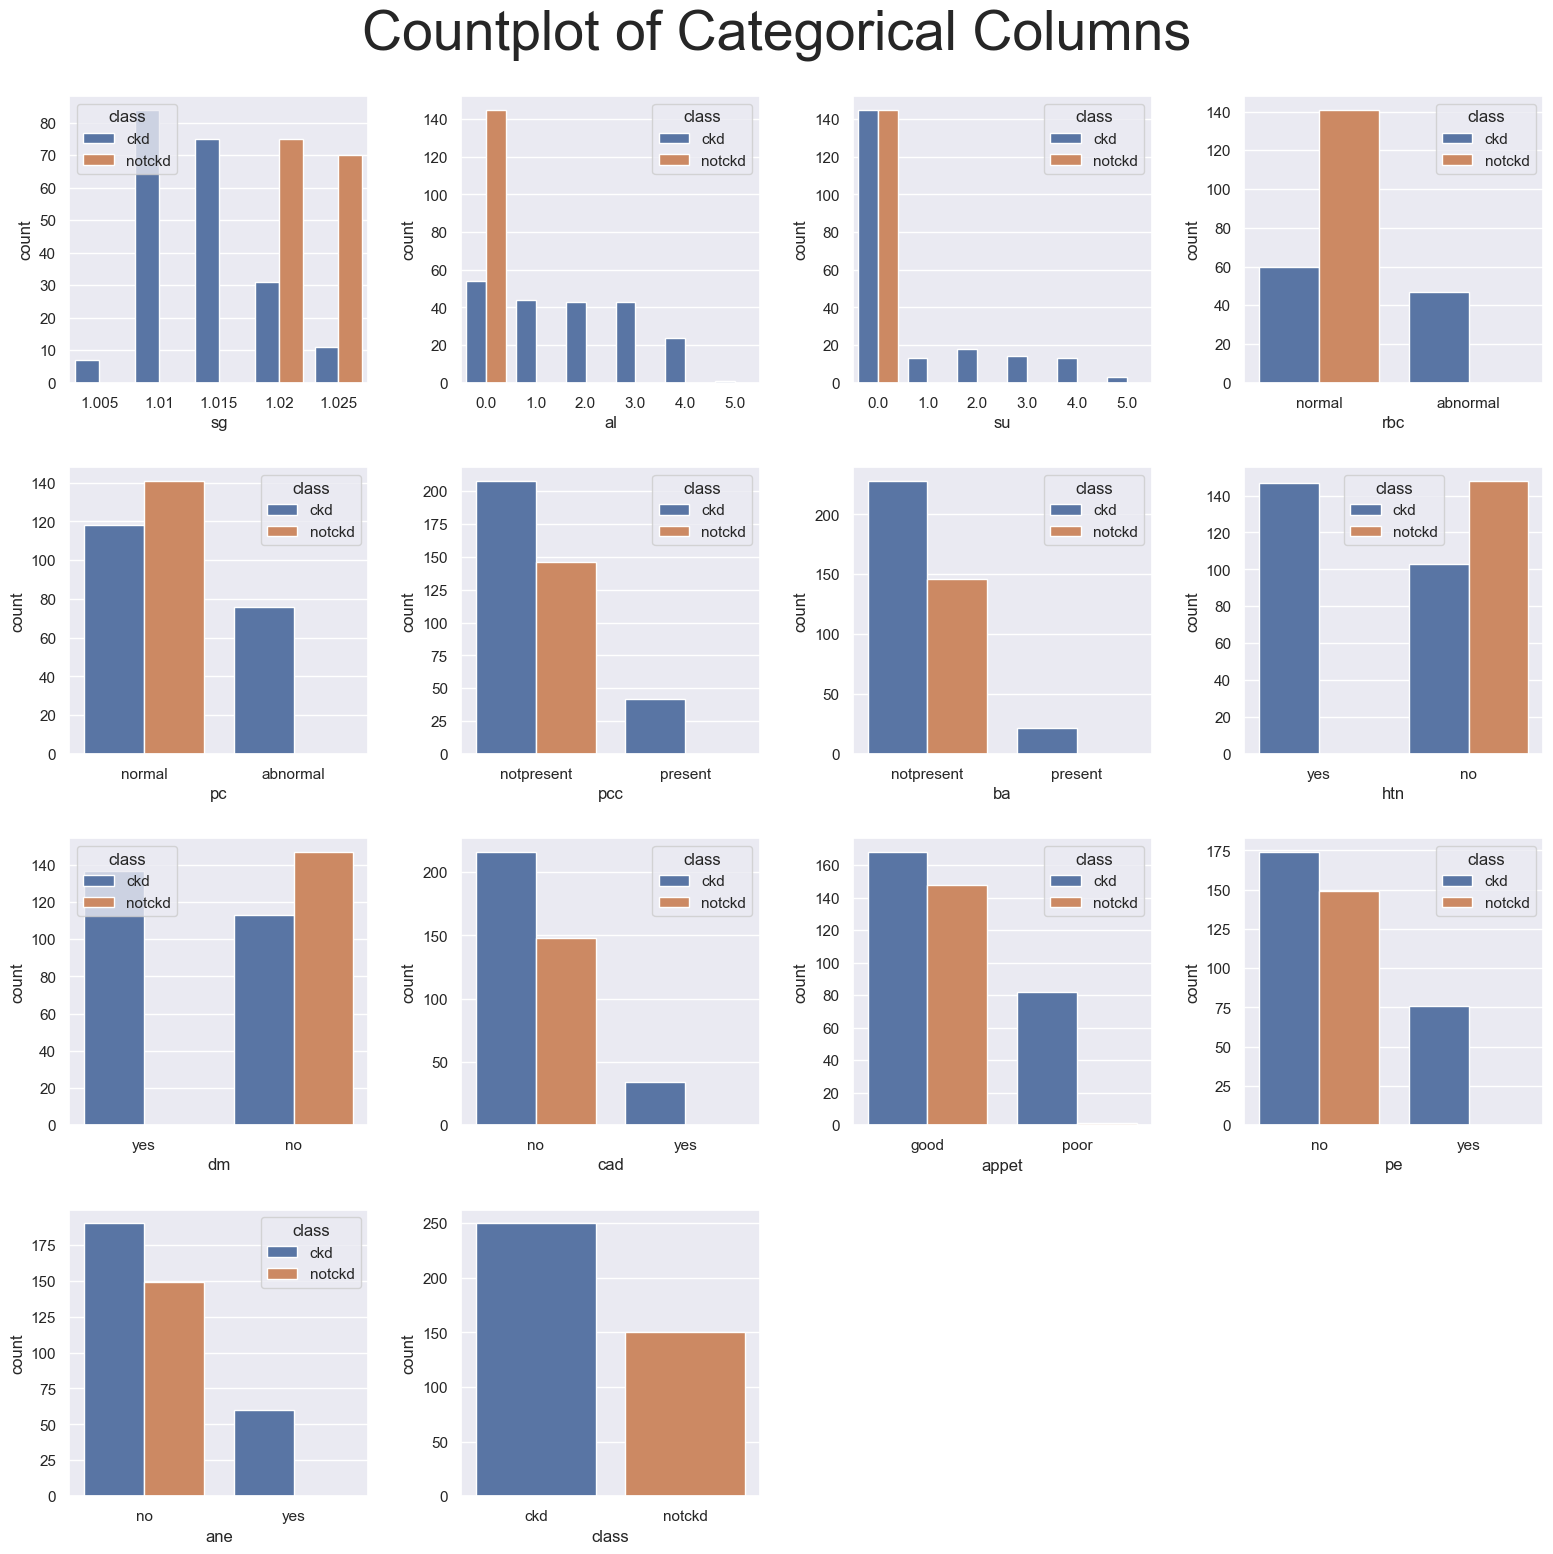

In [21]:
ncols = 4
nrows = int(np.ceil(len(cat_cols) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows))

for idx in range(nrows*ncols):
    row_idx, col_idx = divmod(idx, ncols)
    
    if idx < len(cat_cols):
        sns.countplot(x=df[cat_cols[idx]], ax=ax[row_idx, col_idx], hue=df['class'])
    else:
        ax[row_idx, col_idx].axis('off')

fig.suptitle('Countplot of Categorical Columns', fontsize=40)
plt.tight_layout(pad=2.0)
plt.show()

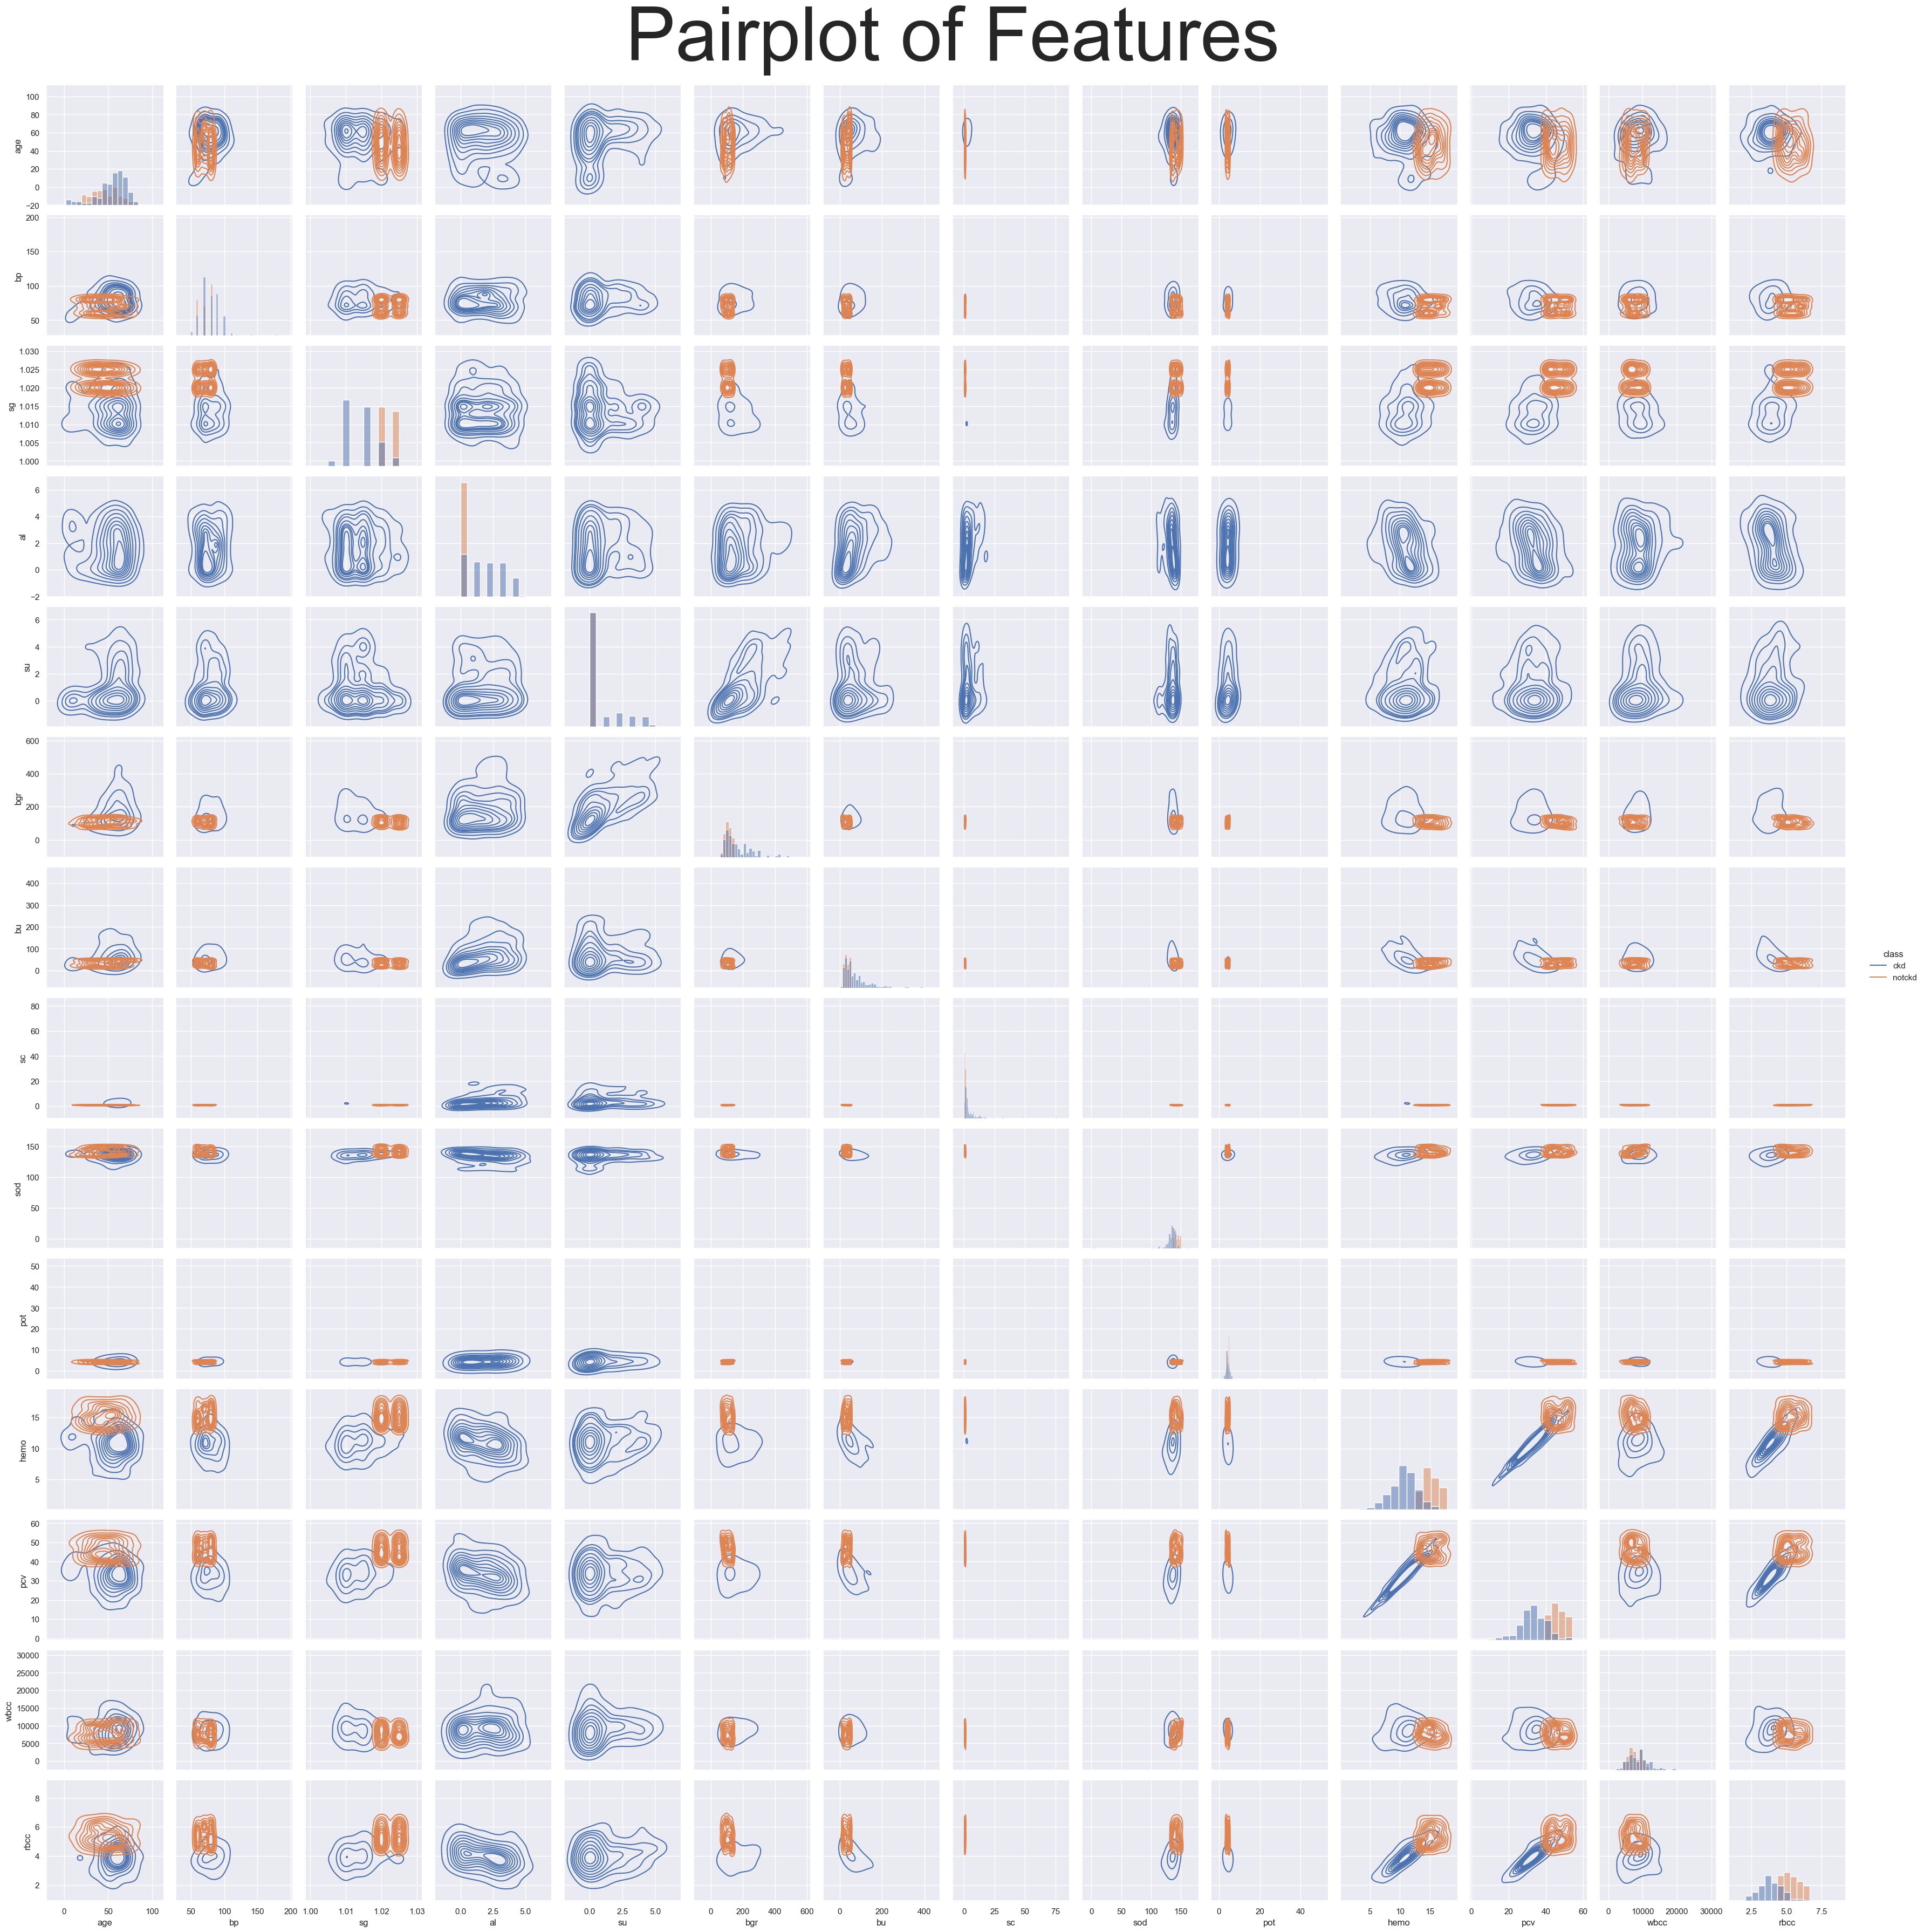

In [22]:
ax = sns.pairplot(df, hue='class', kind='kde', diag_kind='hist')
plt.suptitle('Pairplot of Features', fontsize=100, y=1.03)
plt.show()

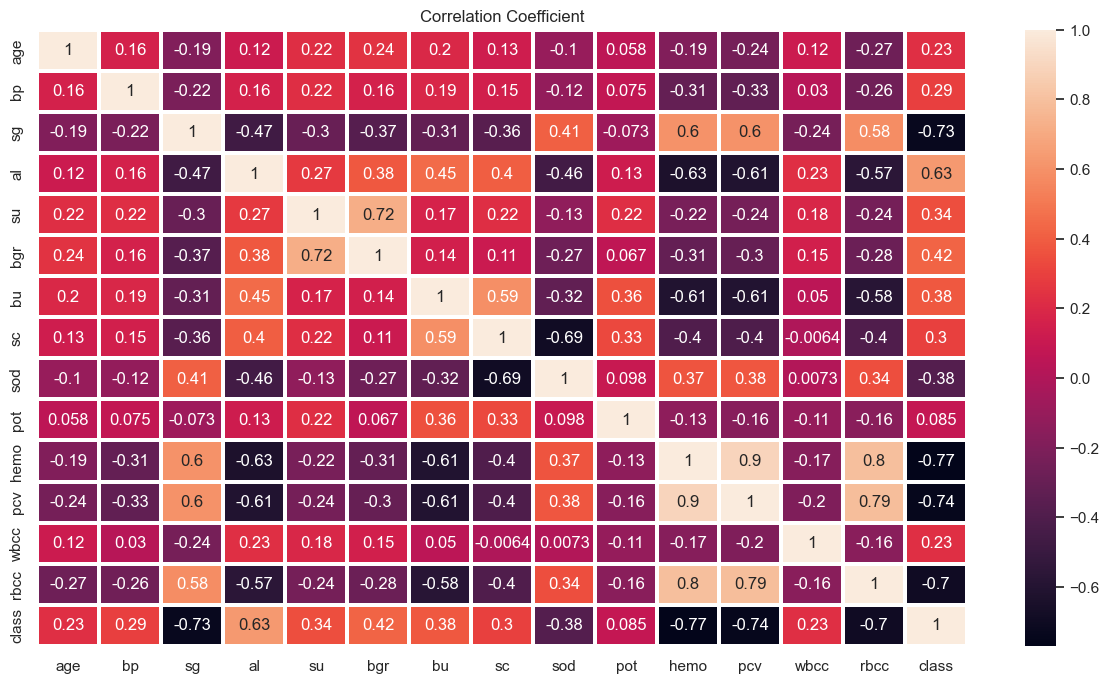

In [23]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Add the 'class' column back to df_numeric
df_numeric['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

# Correlation matrix 
data_corr_num = df_numeric.corr()
plt.figure(figsize = (15,8))
ax = sns.heatmap(data_corr_num, annot=True, linewidth=1.5)
ax.set_title('Correlation Coefficient')
plt.show()

## Pre-processing

### Encode the Categorical Data & Normalize the Continuous Data

In [24]:
print('Unique Values:')
print(df.apply(pd.Series.unique))
print('\nTotal Unique Values:')
print(df.nunique())

Unique Values:
age      [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0...
bp       [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110...
sg                  [1.02, 1.01, 1.005, 1.015, nan, 1.025]
al                     [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
su                     [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]
rbc                                [nan, normal, abnormal]
pc                                 [normal, abnormal, nan]
pcc                             [notpresent, present, nan]
ba                              [notpresent, present, nan]
bgr      [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0,...
bu       [36.0, 18.0, 53.0, 56.0, 26.0, 25.0, 54.0, 31....
sc       [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...
sod      [nan, 111.0, 142.0, 104.0, 114.0, 131.0, 138.0...
pot      [nan, 2.5, 3.2, 4.0, 3.7, 4.2, 5.8, 3.4, 6.4, ...
hemo     [15.4, 11.3, 9.6, 11.2, 11.6, 12.2, 12.4, 10.8...
pcv      [44.0, 38.0, 31.0, 32.0, 35.0, 39.0, 36.0, 33....
wbcc     [7800.0, 6000.0, 7500.0, 6700.0,

In [25]:
print('Total Missing Values:')
print(df.isna().sum())

Total Missing Values:
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [26]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_cols_X = cat_cols[:-1]
obj_cols_X = [col for col in df.columns if df[col].dtype == 'object' and col != 'class']
X_cols = df.columns[:-1]

df_processed = df.copy()
df.tail()

age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

       bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc htn  dm cad appet  \
395  140.0  49.0  0.5  150.0  4.9  15.7  47.0  6700.0   4.9  no  no  no  good   
396   75.0  31.0  1.2  141.0  3.5  16.5  54.0  7800.0   6.2  no  no  no  good   
397  100.0  26.0  0.6  137.0  4.4  15.8  49.0  6600.0   5.4  no  no  no  good   
398  114.0  50.0  1.0  135.0  4.9  14.2  51.0  7200.0   5.9  no  no  no  good   
399  131.0  18.0  1.1  141.0  3.5  15.8  53.0  6800.0   6.1  no  no  no  good   

     pe ane   class  
395  no  no  notckd  
396  no  no  notckd  
397  no  no  notckd  
398  no  no  notckd  
399  no  no  notckd

In [27]:
# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df_processed[cat_cols_X] = cat_imputer.fit_transform(df_processed[cat_cols_X])
df_processed.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0   1.02  1.0  0.0  normal    normal  notpresent  notpresent   
1   7.0  50.0   1.02  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0   1.01  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0   1.01  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad appet  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no  good   
1    NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no  good   
2  423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no  poor   
3  117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no  poor   
4  106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no  good   

    pe  ane class  
0   no   no   ckd  
1   no   no   ckd  
2   no  yes   ckd  
3  yes  yes   ckd  
4   no   no   ckd

In [28]:
# Encode categorical columns
encoder = OrdinalEncoder()
df_processed[obj_cols_X] = encoder.fit_transform(df_processed[obj_cols_X])
df_processed.head()

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr    bu   sc    sod  \
0  48.0  80.0   1.02  1.0  0.0  1.0  1.0  0.0  0.0  121.0  36.0  1.2    NaN   
1   7.0  50.0   1.02  4.0  0.0  1.0  1.0  0.0  0.0    NaN  18.0  0.8    NaN   
2  62.0  80.0   1.01  2.0  3.0  1.0  1.0  0.0  0.0  423.0  53.0  1.8    NaN   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  56.0  3.8  111.0   
4  51.0  80.0   1.01  2.0  0.0  1.0  1.0  0.0  0.0  106.0  26.0  1.4    NaN   

   pot  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  NaN  15.4  44.0  7800.0   5.2  1.0  1.0  0.0    0.0  0.0  0.0   ckd  
1  NaN  11.3  38.0  6000.0   NaN  0.0  0.0  0.0    0.0  0.0  0.0   ckd  
2  NaN   9.6  31.0  7500.0   NaN  0.0  1.0  0.0    1.0  0.0  1.0   ckd  
3  2.5  11.2  32.0  6700.0   3.9  1.0  0.0  0.0    1.0  1.0  1.0   ckd  
4  NaN  11.6  35.0  7300.0   4.6  0.0  0.0  0.0    0.0  0.0  0.0   ckd

In [29]:
# Encode the label
df_processed['class'] = df_processed['class'].map({'ckd': 1, 'notckd': 0})
df_processed.head()

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr    bu   sc    sod  \
0  48.0  80.0   1.02  1.0  0.0  1.0  1.0  0.0  0.0  121.0  36.0  1.2    NaN   
1   7.0  50.0   1.02  4.0  0.0  1.0  1.0  0.0  0.0    NaN  18.0  0.8    NaN   
2  62.0  80.0   1.01  2.0  3.0  1.0  1.0  0.0  0.0  423.0  53.0  1.8    NaN   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  56.0  3.8  111.0   
4  51.0  80.0   1.01  2.0  0.0  1.0  1.0  0.0  0.0  106.0  26.0  1.4    NaN   

   pot  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane  class  
0  NaN  15.4  44.0  7800.0   5.2  1.0  1.0  0.0    0.0  0.0  0.0      1  
1  NaN  11.3  38.0  6000.0   NaN  0.0  0.0  0.0    0.0  0.0  0.0      1  
2  NaN   9.6  31.0  7500.0   NaN  0.0  1.0  0.0    1.0  0.0  1.0      1  
3  2.5  11.2  32.0  6700.0   3.9  1.0  0.0  0.0    1.0  1.0  1.0      1  
4  NaN  11.6  35.0  7300.0   4.6  0.0  0.0  0.0    0.0  0.0  0.0      1

In [30]:
# X = features, y = label
X = df_processed.iloc[:,:-1]
y = df_processed.iloc[:,-1]

In [31]:
# Handle missing values for numerical columns
cont_imputer = KNNImputer()
X = cont_imputer.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)
X.head()

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr    bu   sc    sod  \
0  48.0  80.0  1.020  1.0  0.0  1.0  1.0  0.0  0.0  121.0  36.0  1.2  137.6   
1   7.0  50.0  1.020  4.0  0.0  1.0  1.0  0.0  0.0  113.0  18.0  0.8  136.8   
2  62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.0  53.0  1.8  133.8   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  56.0  3.8  111.0   
4  51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.0  26.0  1.4  138.4   

    pot  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane  
0  4.20  15.4  44.0  7800.0  5.20  1.0  1.0  0.0    0.0  0.0  0.0  
1  3.92  11.3  38.0  6000.0  4.96  0.0  0.0  0.0    0.0  0.0  0.0  
2  4.20   9.6  31.0  7500.0  3.80  0.0  1.0  0.0    1.0  0.0  1.0  
3  2.50  11.2  32.0  6700.0  3.90  1.0  0.0  0.0    1.0  1.0  1.0  
4  3.98  11.6  35.0  7300.0  4.60  0.0  0.0  0.0    0.0  0.0  0.0

In [32]:
# Check for missing values after imputation
print(f'Total Missing Values:')
print('X:')
print(X.isna().sum())
print(f'y: {y.isna().sum()}')

Total Missing Values:
X:
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64
y: 0


In [33]:
# Describe the feature data
X.describe()

age          bp          sg         al          su         rbc  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean    51.266500   76.315000    1.017712    0.90000    0.395000    0.882500   
std     17.080904   13.556926    0.005434    1.31313    1.040038    0.322418   
min      2.000000   50.000000    1.005000    0.00000    0.000000    0.000000   
25%     42.000000   70.000000    1.015000    0.00000    0.000000    1.000000   
50%     54.000000   80.000000    1.020000    0.00000    0.000000    1.000000   
75%     64.000000   80.000000    1.020000    2.00000    0.000000    1.000000   
max     90.000000  180.000000    1.025000    5.00000    5.000000    1.000000   

               pc         pcc          ba         bgr          bu          sc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.810000    0.105000    0.055000  149.275500   57.721000    3.080475   
std      0.392792    0.306937    0.228266   76.756181   49.606132    5.632208   
min      0.000000    0.000000    0.000000   22.000000    1.500000    0.400000   
25%      1.000000    0.000000    0.000000  100.000000   27.000000    0.900000   
50%      1.000000    0.000000    0.000000  122.000000   44.000000    1.360000   
75%      1.000000    0.000000    0.000000  171.250000   66.000000    2.900000   
max      1.000000    1.000000    1.000000  490.000000  391.000000   76.000000   

              sod         pot        hemo         pcv          wbcc  \
count  400.000000  400.000000  400.000000  400.000000    400.000000   
mean   137.551250    4.572400   12.575300   38.980500   8473.250000   
std      9.281574    2.826921    2.763631    8.379215   2588.948836   
min      4.500000    2.500000    3.100000    9.000000   2200.000000   
25%    135.000000    3.900000   10.800000   33.000000   6900.000000   
50%    138.000000    4.400000   12.850000   40.100000   8390.000000   
75%    141.000000    4.900000   14.800000   45.000000   9600.000000   
max    163.000000   47.000000   17.800000   54.000000  26400.000000   

             rbcc         htn         dm         cad       appet          pe  \
count  400.000000  400.000000  400.00000  400.000000  400.000000  400.000000   
mean     4.707150    0.367500    0.34250    0.085000    0.207500    0.190000   
std      0.890655    0.482728    0.47514    0.279231    0.406024    0.392792   
min      2.100000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%      4.140000    0.000000    0.00000    0.000000    0.000000    0.000000   
50%      4.800000    0.000000    0.00000    0.000000    0.000000    0.000000   
75%      5.260000    1.000000    1.00000    0.000000    0.000000    0.000000   
max      8.000000    1.000000    1.00000    1.000000    1.000000    1.000000   

              ane  
count  400.000000  
mean     0.150000  
std      0.357519  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

### Splitting the Dataset into Training and Test Set

In [34]:
print(f'Shape Before Split:\nX: {X.shape}\ny: {y.shape}')

Shape Before Split:
X: (400, 24)
y: (400,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED, stratify=y) # 80% training and 20% test
print(f'Shape After Split:\nX_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

Shape After Split:
X_train: (320, 24)
X_test: (80, 24)
y_train: (320,)
y_test: (80,)


In [36]:
X_train.head()

age     bp     sg   al   su  rbc   pc  pcc   ba    bgr     bu    sc  \
108  45.0   80.0  1.015  0.0  0.0  1.0  0.0  0.0  0.0  107.0   15.0   1.0   
210  59.0  100.0  1.015  4.0  2.0  1.0  1.0  0.0  0.0  255.0  132.0  12.8   
137  45.0   60.0  1.010  2.0  0.0  1.0  0.0  1.0  0.0  268.0   86.0   4.0   
148  69.0   60.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  171.0   26.0  48.1   
246  48.0  110.0  1.015  3.0  0.0  0.0  1.0  1.0  0.0  106.0  215.0  15.2   

       sod   pot   hemo   pcv     wbcc  rbcc  htn   dm  cad  appet   pe  ane  
108  141.0  4.20  11.80  37.0  10200.0  4.20  0.0  0.0  0.0    0.0  0.0  0.0  
210  135.0  5.70   7.30  20.0   9800.0  3.90  1.0  1.0  1.0    0.0  0.0  1.0  
137  134.0  5.10  10.00  29.0   9200.0  4.04  1.0  1.0  0.0    0.0  0.0  0.0  
148  136.2  4.14  13.92  41.8   8980.0  5.30  1.0  0.0  0.0    1.0  0.0  0.0  
246  120.0  5.70   8.60  26.0   5000.0  2.50  1.0  0.0  1.0    0.0  0.0  1.0

### Feature Scaling (Standarization) for Continuous Data

In [37]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

age        bp     sg   al   su  rbc   pc  pcc   ba       bgr  \
108 -0.346987  0.243994  1.015  0.0  0.0  1.0  0.0  0.0  0.0 -0.541833   
210  0.476808  1.671384  1.015  4.0  2.0  1.0  1.0  0.0  0.0  1.474290   
137 -0.346987 -1.183395  1.010  2.0  0.0  1.0  0.0  1.0  0.0  1.651382   
148  1.065233 -1.183395  1.020  0.0  0.0  1.0  1.0  0.0  0.0  0.330004   
246 -0.170459  2.385079  1.015  3.0  0.0  0.0  1.0  1.0  0.0 -0.555456   

           bu        sc       sod       pot      hemo       pcv      wbcc  \
108 -0.883385 -0.365857  0.392243 -0.230615 -0.268942 -0.213266  0.634793   
210  1.530701  1.633152 -0.221286  1.963973 -1.869923 -2.245080  0.486968   
137  0.581573  0.142366 -0.323541  1.086138 -0.909335 -1.169414  0.265230   
148 -0.656420  7.613238 -0.098580 -0.318398  0.485297  0.360423  0.183927   
246  3.243258  2.039730 -1.755108  1.963973 -1.407418 -1.527969 -1.286932   

         rbcc  htn   dm  cad  appet   pe  ane  
108 -0.567452  0.0  0.0  0.0    0.0  0.0  0.0  
210 -0.906482  1.0  1.0  1.0    0.0  0.0  1.0  
137 -0.748268  1.0  1.0  0.0    0.0  0.0  0.0  
148  0.675659  1.0  0.0  0.0    1.0  0.0  0.0  
246 -2.488622  1.0  0.0  1.0    0.0  0.0  1.0

### Applying Feature Extraction (Kernel PCA) to Reduce Dimension

In [38]:
from sklearn.decomposition import KernelPCA

feat_extraction = KernelPCA(n_components = 8, kernel = 'rbf')
X_train = feat_extraction.fit_transform(X_train)
X_test = feat_extraction.transform(X_test)

print(f'Shape after PCA:\nX_train: {X_train.shape}\nX_test: {X_test.shape}')

Shape after PCA:
X_train: (320, 8)
X_test: (80, 8)


In [39]:
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6  \
0 -0.108846  0.159236 -0.266436 -0.045360  0.118290 -0.074653  0.146960   
1  0.571500 -0.209257  0.258384 -0.106756 -0.143785  0.009982 -0.109543   
2  0.436069  0.034140 -0.044531  0.005860 -0.126463 -0.140584  0.189903   
3  0.297324 -0.245707  0.216251 -0.143656 -0.027600  0.200076 -0.024435   
4  0.487450 -0.236162  0.148604 -0.237565 -0.243950  0.168260 -0.239906   

          7  
0  0.179992  
1  0.049286  
2 -0.254009  
3  0.008553  
4  0.076180

### Save the Imputer, Encoder, Scaler, Feature Extraction, and Column Info

In [40]:
import pickle, json

with open("./../assets/cat_imputer.pickle", "wb") as file:
    pickle.dump(cat_imputer, file)

with open("./../assets/encoder.pickle", "wb") as file:
    pickle.dump(encoder, file)

with open("./../assets/cont_imputer.pickle", "wb") as file:
    pickle.dump(cont_imputer, file)

with open("./../assets/scaler.pickle", "wb") as file:
    pickle.dump(scaler, file)

with open("./../assets/feat_extraction.pickle", "wb") as file:
    pickle.dump(feat_extraction, file)

column_info = {
    'full': full[:-1],
    'abbrev': X_cols.to_list(),
    'cat_imputer': cat_cols_X,
    'encoder': obj_cols_X,
    'scaler': num_cols
}

with open("./../assets/column_info.json", "w") as file: 
    json.dump(column_info, file)


# Modelling and Evaluation

## Modelling

### Hyperparameter Tuning and Cross Validation for Model Selection

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model parameters that will be tested
model_params = {
    'lgr': {
        'model': LogisticRegression(random_state = SEED),
        'params': {
            'C': [0.25, 0.5, 0.75, 1], 
            'max_iter': [100, 200, 300, 400, 500]
        }
    },

    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 9, 13, 15], 
            'weights': ['uniform', 'distance'], 
            'metric' : ['minkowski','euclidean','manhattan']
        }
    },

    'svc': {
        'model': SVC(random_state = SEED),
        'params': {
                'C': [0.1, 1, 10, 100, 1000], 
                'kernel': ['linear', 'rbf', 'sigmoid']
            }
    },

    'gnb': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]                    }
    },

    'dt': {
        'model': DecisionTreeClassifier(random_state = SEED),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'], 
            'splitter': ['best', 'random']
        }
    },

    'rf': {
        'model': RandomForestClassifier(random_state = SEED),
        'params': {
            'n_estimators': [25, 50, 100, 200, 300], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9, 12, 15], 
            'max_leaf_nodes': [3, 6, 9, 12, 15],
            'criterion': ['gini', 'entropy', 'log_loss'], 
            'max_features': ['sqrt', 'log2', None]
        }
    },

    'xgb': {
        'model': XGBClassifier(random_state = SEED),
        'params': {
            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 
            'max_depth': [3, 6, 9, 12, 15], 
            'n_estimators': [25, 50, 100, 200, 300],
            'subsample': [0.5, 1]
        }
    }
}

In [42]:
from sklearn.model_selection import GridSearchCV

gs_results = []

# Iteratively test the models and cross validate
for key, values in model_params.items():
    gs = GridSearchCV(values['model'], values['params'], scoring='f1', cv=4, n_jobs=-1) # Using cv=4 so the validation size the same as the test size (80 rows)
    gs.fit(X_train, y_train)
    gs_results.append(
        {
            'model': key,
            'best_param': gs.best_params_,
            'best_score': gs.best_score_,
            'std_of_best': gs.cv_results_['std_test_score'][gs.best_index_]
        }
    )

gs_results_pd = pd.DataFrame(gs_results, columns=['model', 'best_param', 'best_score', 'std_of_best'])
gs_results_pd

model                                         best_param  best_score  \
0   lgr                       {'C': 0.75, 'max_iter': 100}    0.974488   
1   knn  {'metric': 'manhattan', 'n_neighbors': 13, 'we...    0.968798   
2   svc                    {'C': 1000, 'kernel': 'linear'}    0.982321   
3   gnb                           {'var_smoothing': 1e-09}    0.977421   
4    dt       {'criterion': 'entropy', 'splitter': 'best'}    0.972505   
5    rf  {'criterion': 'entropy', 'max_depth': 6, 'max_...    0.984947   
6   xgb  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...    0.984998   

   std_of_best  
0     0.005108  
1     0.016811  
2     0.004494  
3     0.008304  
4     0.014209  
5     0.011118  
6     0.008488

In [43]:
# Get the best model
best_model = gs_results_pd.sort_values(by=['best_score'], ascending=False).iloc[0,:]
print('Best Model:')
for key, value in best_model.items():
    print(f'{key}: {value}')

Best Model:
model: xgb
best_param: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
best_score: 0.9849984998499851
std_of_best: 0.008487897746862216


### Modelling and Train the Model Using the Whole Training Set

In [44]:
# use the best model
clf = XGBClassifier(random_state=SEED)
clf.set_params(**best_model['best_param'])
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluation

### Predict the Test Set

In [45]:
# Get the predictions
y_pred = clf.predict(X_test)

### Creating and Visualize the Confusion Matrix

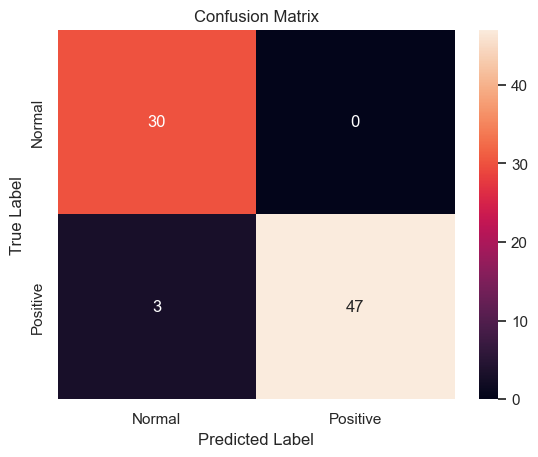

In [46]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Normal', 'Positive'], yticklabels=['Normal', 'Positive'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

### Evaluate Using Classification Report (Accuracy, Precision, Recall, F1) and ROC AUC Score

In [47]:
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.94      0.97        50

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

ROC AUC Score: 0.97


# Save the Model

In [48]:
with open("./../assets/model.pickle", "wb") as file:
    pickle.dump(clf, file)